<a href="https://colab.research.google.com/github/maxGrigorenko/DistributionClassifier/blob/maxGrigorenko%2Ffirst_part/src/experiments_first_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация распределений. Первая часть проекта

## 1. Исследуем, как зависят характеристики графов от случайных величин


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product

from distibution_functions import *

In [14]:

def plot_sigma(points_number, begin, end, number_of_experiments=5, k=3, d=0.1, n=100):
    dominating_number_arr = []
    delta_arr = []
    sigma_arr = np.linspace(begin, end, points_number)

    for sigma in tqdm(sigma_arr):
        dominating_number = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="distance",
                                      distribution="normal", sigma=sigma, d=d)

        delta = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="knn",
                          distribution="normal", sigma=sigma, k=k)

        dominating_number_arr.append(dominating_number)
        delta_arr.append(delta)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    ax1.plot(sigma_arr, dominating_number_arr, color='blue')
    ax1.set_title('distance graph dominating number from different sigma')
    ax1.set_xlabel('sigma')
    ax1.set_ylabel('dominating number')

    ax2.plot(sigma_arr, delta_arr, color='red')
    ax2.set_title('knn graph delta from different sigma')
    ax2.set_xlabel('sigma')
    ax2.set_ylabel('delta')

    plt.tight_layout()
    plt.show()


Проведем несколько экспериментов, зафиксировав размер выборки n = 50

100%|██████████| 100/100 [00:01<00:00, 57.93it/s]


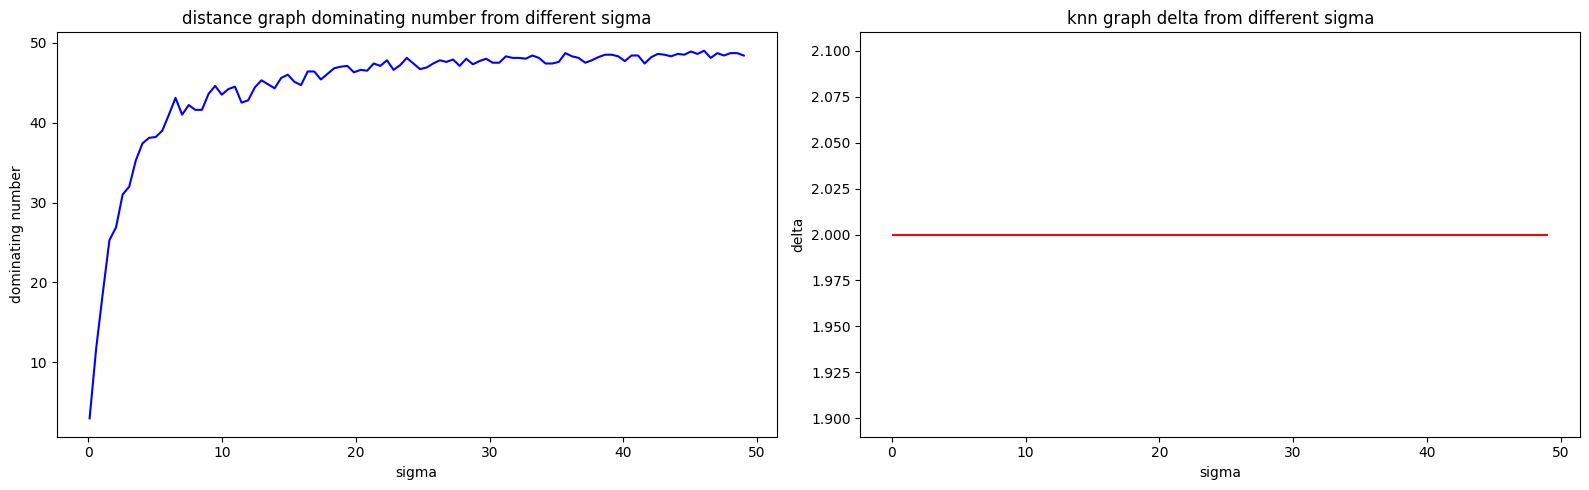

In [15]:
plot_sigma(100, begin=0.1, end=49.0, number_of_experiments=10, k=2, d=0.1, n=50) # k = 2, d = 0.1

Несложно понять, почему delta константа (из-за использования knn), но также можем видеть, что очень слабо отличаются и средние значения числа доминирования (от 15 до 17), на графике не видно какой-то закономерности, вероятно, при большем числе экспериментов среднее число доминирования тоже будет стремиться к константе

100%|██████████| 100/100 [00:01<00:00, 61.20it/s]


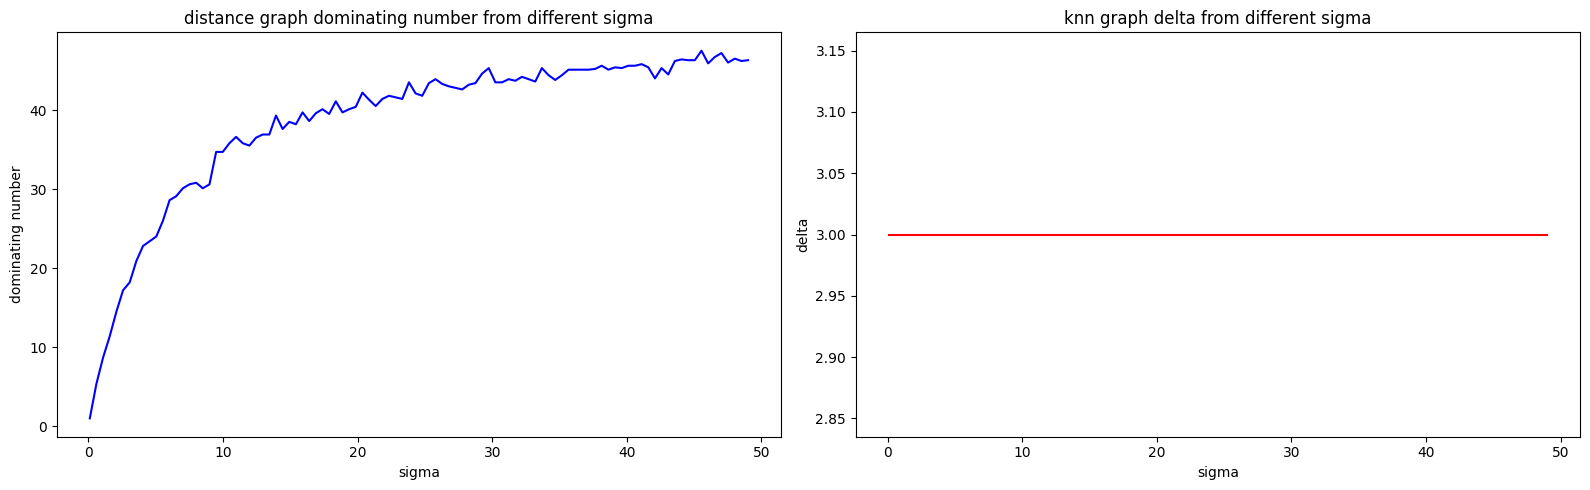

In [16]:
plot_sigma(100, begin=0.1, end=49.0, number_of_experiments=10, k=3, d=0.3, n=50) # k = 3, d = 0.2

100%|██████████| 100/100 [00:01<00:00, 54.14it/s]


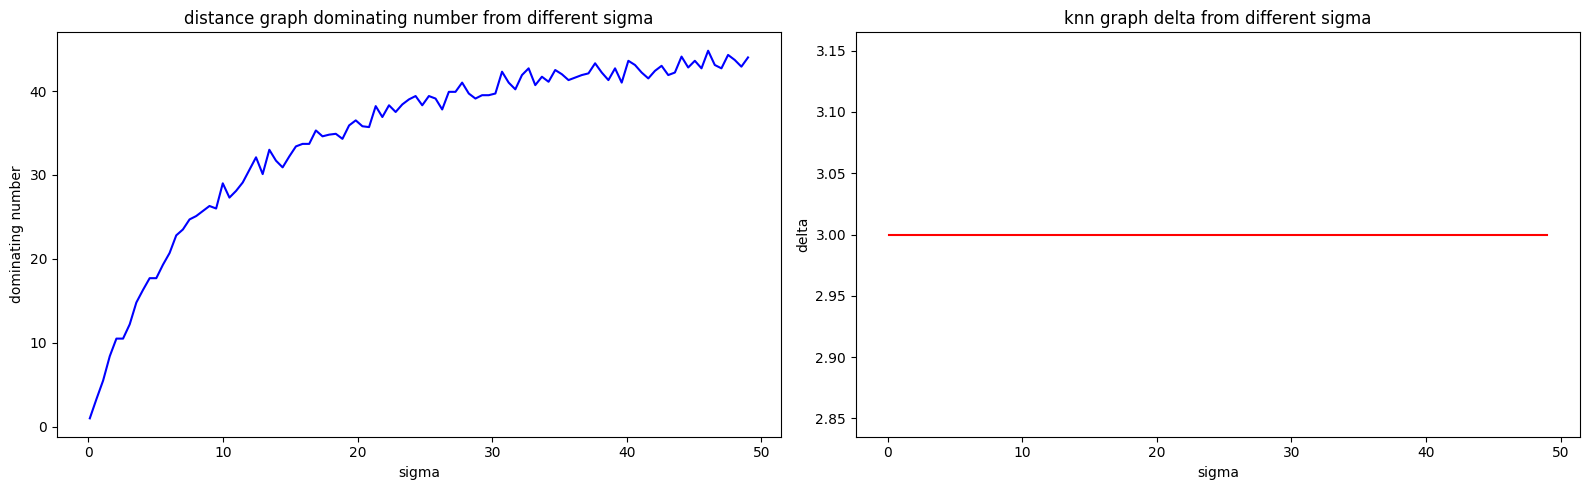

In [17]:
plot_sigma(100, begin=0.1, end=49.0, number_of_experiments=10, k=3, d=0.5, n=50) # k = 3, d = 0.5

Во всех knn графах delta = k, зависимости с параметром sigma нет.  
Отчетливо видна зависимость числа доминирования от sigma.  
Теперь рассмотрим распределение Лапласа


In [18]:
def plot_beta(points_number, begin, end, number_of_experiments=5, k=3, d=0.1, n=100):
    dominating_number_arr = []
    delta_arr = []
    beta_arr = np.linspace(begin, end, points_number)

    for beta in tqdm(beta_arr):
        dominating_number = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="distance",
                                      distribution="laplace", beta=beta, d=d)

        delta = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="knn",
                          distribution="laplace", beta=beta, k=k)

        dominating_number_arr.append(dominating_number)
        delta_arr.append(delta)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    ax1.plot(beta_arr, dominating_number_arr, color='blue')
    ax1.set_title('distance graph dominating number from different beta')
    ax1.set_xlabel('beta')
    ax1.set_ylabel('dominating number')

    ax2.plot(beta_arr, delta_arr, color='red')
    ax2.set_title('knn graph delta from different beta')
    ax2.set_xlabel('beta')
    ax2.set_ylabel('delta')

    plt.tight_layout()
    plt.show()


100%|██████████| 100/100 [00:01<00:00, 61.91it/s]


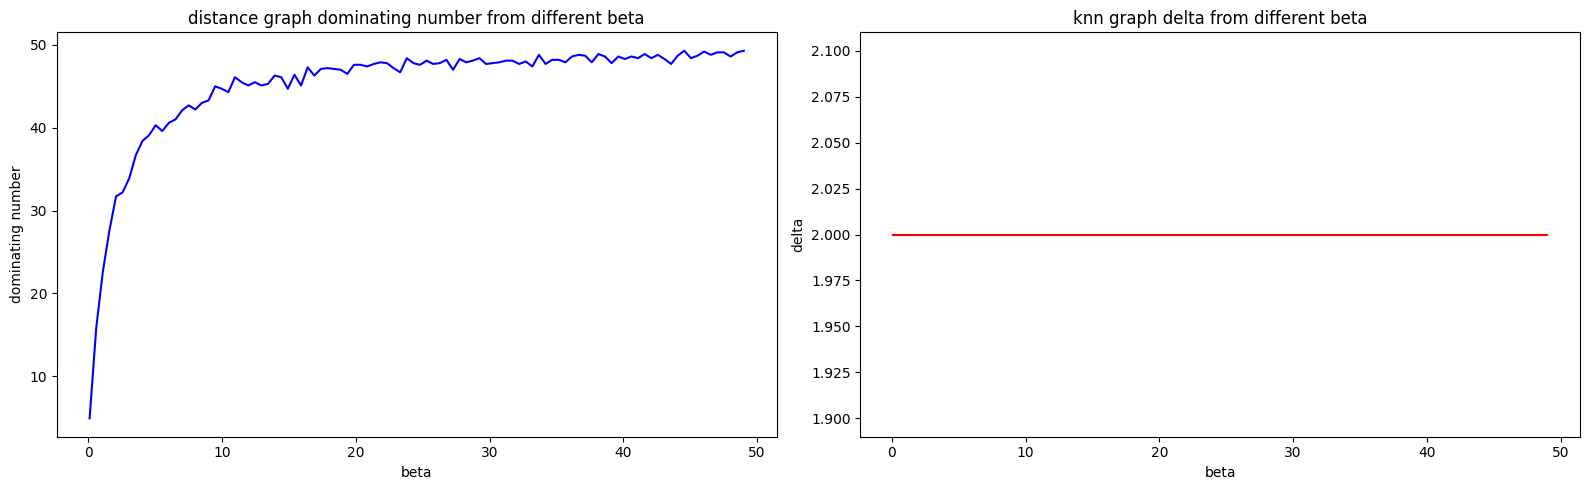

In [22]:
plot_beta(100, begin=0.1, end=49.0, number_of_experiments=10, k=2, d=0.1, n=50)

Наблюдаем ту же картину, что и с нормальным распределением - не видно никакой зависимости характеристик графа knn от параметра распределения. В связи с этим нет смысла далее изучать характеристики графа knn.

100%|██████████| 100/100 [00:01<00:00, 60.60it/s]


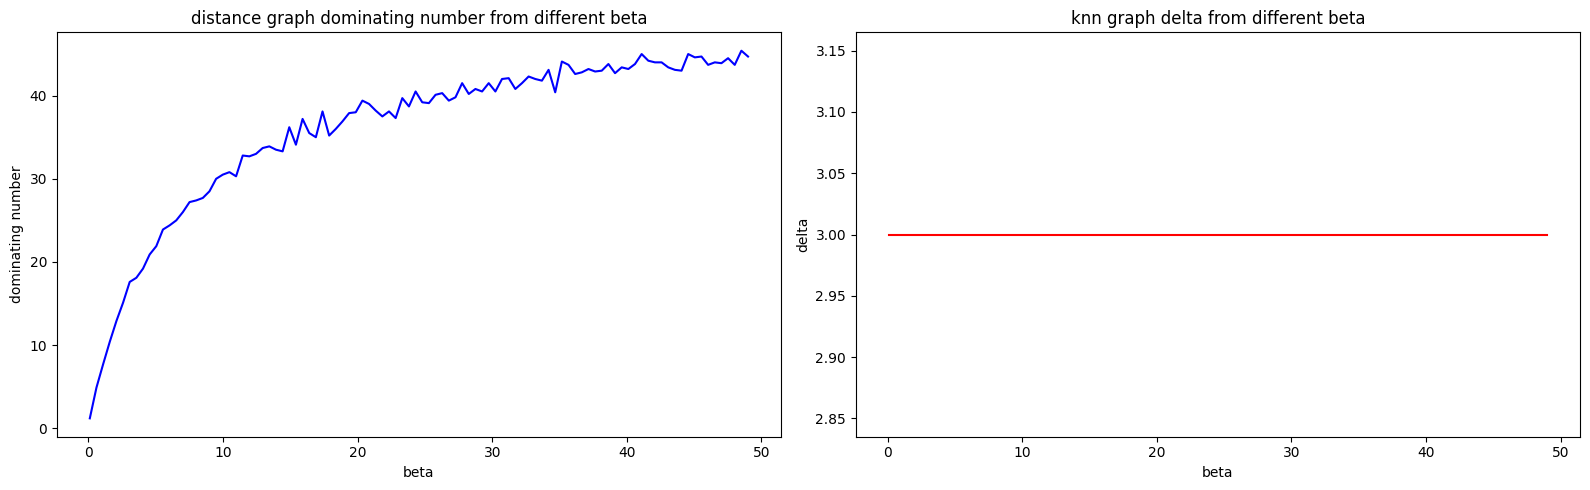

In [25]:
plot_beta(100, begin=0.1, end=49.0, number_of_experiments=10, d=0.5, n=50) # d = 0.5

Снова имеет похожую ситуацию с нормальным распределением.